In [1]:
# import packages
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

### read the data

In [51]:
# Read the output of MetaPhlAn3
assembly = pd.read_excel('input/assembly.xlsx')
dfA = assembly[['Bin name', 'Sample name','Calculated Relative Abundance, %', 'Defined bins species',
                'Overalp','Bin quality']].reset_index(drop=True).dropna()
dfA.head(2)


,Bin name,Sample name,"Calculated Relative Abundance, %",Defined bins species,Overalp,Bin quality
0,V3276M_maxbin.028.fa,V3276M,6.335220,Tidjanibacter inops,no,LQ
1,V3276M_maxbin.036.fa,V3276M,6.212023,Parabacteroides distasonis,yes,HQ


In [18]:
profiling = pd.read_excel('input/profiling.xlsx')
dfP = profiling.copy().dropna()
dfP.head(2)

,Sample name,Defined species,"Calculated Relative Abundance, %",Overalp
0,V40FOF,Bacteroides vulgatus,26.73279,no
1,V3276M,Bacteroides uniformis,22.36095,no


### Sp numbers

In [33]:
print('Assembly:')
print(len(dfA), 'bins,', len(dfA['Defined bins species'].unique()), 'unique species')
print('Profiling:')
print(len(dfP), 'sp,', len(dfP['Defined species'].unique()), 'unique species')

Assembly:
134 bins, 98 unique species
Profiling:
308 sp, 167 unique species


In [35]:
print('Species assembled per sample:')
dfP['Sample name'].value_counts()

Species assembled per sample:


V32MIP    116
V3276M     98
V40FOF     94
Name: Sample name, dtype: int64

In [34]:
print('Species detected per sample:')
dfA['Sample name'].value_counts()

Species detected per sample:


V40FOF    53
V32MIP    41
V3276M    40
Name: Sample name, dtype: int64

### Sp prevalence

In [50]:
n = dfA['Defined bins species'].value_counts().to_frame()
len(n[n['Defined bins species'] == 1])

80

In [44]:
n = dfP['Defined species'].value_counts().to_frame()
len(n[n['Defined species'] == 1])

68

### Bins qual

In [52]:
dfA['Bin quality'].value_counts()

HQ    51
MQ    51
LQ    32
Name: Bin quality, dtype: int64

In [53]:
51/134

0.3805970149253731

In [19]:
# aggregate the values by samples
dfA.groupby('Sample name')['Overalp'].value_counts().unstack(fill_value=0)

Overalp,no,other name,yes
Sample name,,,
V3276M,31,0,9
V32MIP,36,0,5
V40FOF,40,1,12


### Abundance

In [25]:
print('Assembly')
print('min -',dfA['Calculated Relative Abundance, %'].min())
print('max -',dfA['Calculated Relative Abundance, %'].max())

print('----------')
print('Profiling')
print('min -',dfP['Calculated Relative Abundance, %'].min())
print('max -',dfP['Calculated Relative Abundance, %'].max())

Assembly
min - 0.007800676985112473
max - 14.411630060792477
----------
Profiling
min - 9e-05
max - 26.73279


### Manual name check

In [75]:
prof = dfP['Defined species'].unique()
ass = dfA['Defined bins species'].unique()

#common values in two lists
set(prof) & set(ass)

#common values in two lists
mch = set(prof) - set(ass)
mch
#mch.to_excel('results/name_check.xlsx', index=False)

{'Adlercreutzia equolifaciens',
 'Alistipes indistinctus',
 'Alistipes inops',
 'Alistipes timonensis',
 'Allisonella histaminiformans',
 'Anaerofilum sp An201',
 'Anaeromassilibacillus sp An250',
 'Anaerotignum lactatifermentans',
 'Anaerotruncus colihominis',
 'Arcobacter cryaerophilus',
 'Asaccharobacter celatus',
 'Bacteroides caccae',
 'Bacteroides cellulosilyticus',
 'Bacteroides clarus',
 'Bacteroides coprocola',
 'Bacteroides dorei',
 'Bacteroides eggerthii',
 'Bacteroides faecis',
 'Bacteroides finegoldii',
 'Bacteroides fragilis',
 'Bacteroides galacturonicus',
 'Bacteroides massiliensis',
 'Bacteroides ovatus',
 'Bacteroides pectinophilus',
 'Bacteroides plebeius',
 'Bacteroides sp CAG 144',
 'Bacteroides stercoris',
 'Bacteroides thetaiotaomicron',
 'Bacteroides vulgatus',
 'Bacteroides xylanisolvens',
 'Bifidobacterium adolescentis',
 'Bifidobacterium longum',
 'Bilophila wadsworthia',
 'Blautia hydrogenotrophica',
 'Blautia obeum',
 'Blautia producta',
 'Blautia wexlerae'

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_17719/609467811.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['sample1', 'sample2','sample3'])
/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_17719/609467811.py:28: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(
/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_17719/609467811.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['sample1', 'sample2','sample3'])


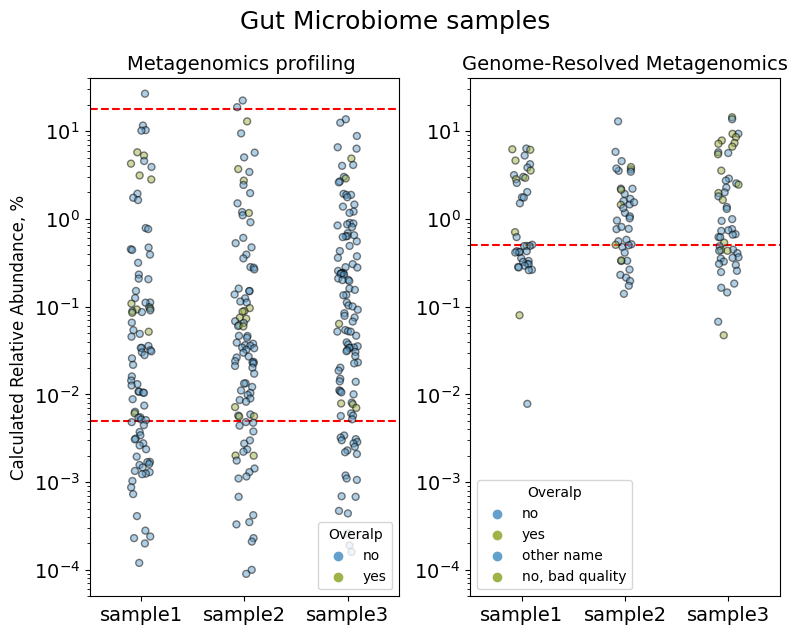

In [10]:
# Readability: Define constants for colors
COLORS = ['#63a1cc', '#9eb348']

# Readability: Create a function for common plot settings
def set_common_plot_settings(ax, title, yscale='linear', ylabel=""):
    ax.set_title(title, fontsize=14)
    ax.set_yscale(yscale)
    ax.set_xlabel("")
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(labelsize=14)
    #ax.legend().set_visible(False)  # Hide legend
    ax.set_xticklabels(['sample1', 'sample2','sample3'])
    ax.set_ylim(0.00005, 40)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

# Plot 1: Reads Classification
sns.stripplot(
    data=dfP, y='Calculated Relative Abundance, %', x='Sample name', hue='Overalp',
    alpha=0.5, s=5, palette=COLORS, edgecolor="black", linewidth=1, ax=ax1  # <-- Changed to ax1
)
set_common_plot_settings(ax1, 'Metagenomics profiling ', yscale='log', ylabel="Calculated Relative Abundance, %")
ax1.axhline(y=0.005, color='r', linestyle='--')
ax1.axhline(y=18, color='r', linestyle='--')

# Plot 2: De Novo Assembly
sns.stripplot(
    data=dfA, y='Calculated Relative Abundance, %', x='Sample name', hue='Overalp',
    alpha=0.5, s=5, palette=COLORS, edgecolor="black", linewidth=1, ax=ax2
)
set_common_plot_settings(ax2, 'Genome-Resolved Metagenomics', yscale='log')
ax2.axhline(y=0.5, color='r', linestyle='--')

# Adjust layout and add a main title
plt.tight_layout()
fig.suptitle('Gut Microbiome samples', fontsize=18, y=1.05)

# Show the plot
fig.savefig('results/Bin_genome_gut.svg', dpi=150)
plt.savefig('results/Bin_genome_gut.png', dpi=150)



/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_92044/520541469.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, y='metaplane_abundance', x='Sample', palette='Set2')


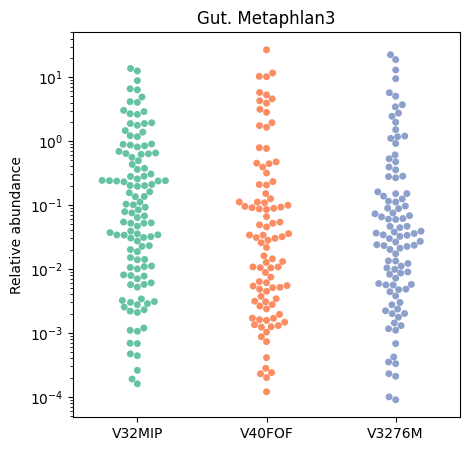

In [16]:
# fig size
plt.figure(figsize=(5, 5))

plt.yscale("log")
sns.swarmplot(data=df, y='metaplane_abundance', x='Sample', palette='Set2')
plt.title('Gut. Metaphlan3')
plt.ylabel('Defined Relative Abundance, %')
plt.xlabel('')

plt.savefig('results/Gut-Metaphlan.png', dpi=300, bbox_inches='tight')

### Regular plots

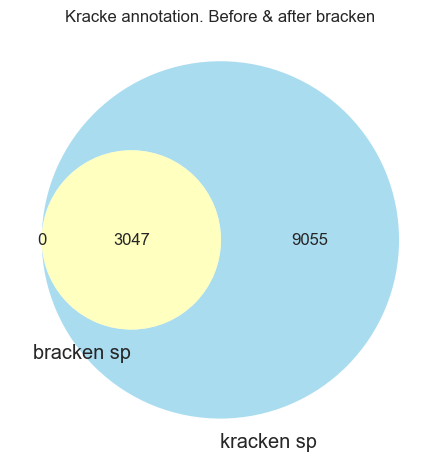

In [81]:
from matplotlib_venn import venn2

venn2([set(bra['name'].to_list()), 
       set(krep['name'].to_list())],
       set_labels=('bracken sp', 'kracken sp'), 
       set_colors=('orange', 'skyblue'), alpha = 0.7)

plt.title('Kracke annotation. Before & after bracken')
plt.tight_layout()
plt.savefig('results/kra_vs_bra.svg')